# Cellular operator tarifs
You are an analystm working for a cellular operator. Customers are offered two tariff plans: “Smart” and “Ultra”. To adjust the advertising budget, the commercial department wants to understand which tariff brings in more money.

You will have to do a preliminary analysis of tariffs on a small sample of clients. At your disposal are the data of 500 Megaline users: who they are, where they are from, what tariff they use, how many calls and messages each person sent in 2018. You need to analyze customer behavior and draw a conclusion - which tariff is better.

**Description of tariffs**

*Tariff "Smart"*
1. Monthly fee: 550 rubles
2. Includes 500 minutes of talk time, 50 messages and 15 GB of Internet traffic
3. Cost of services above the tariff package:
- A minute of conversation costs 3 rubles. Megaline always rounds up the number of minutes and megabytes used. If the user spoke for only 1 second, a whole minute is counted in the tariff.
- Message - 3 rubles.
- 1 GB of Internet traffic - 200 rubles.

*Tariff "Ultra"*

1. Monthly fee: 1950 rubles
2. Includes 3000 minutes of talk time, 1000 messages and 30 GB of Internet traffic
3. Cost of services above the tariff package:
- One minute of conversation - 1 ruble;
- Message - 1 ruble;
- 1 GB of Internet traffic: 150 rubles.

**Data Description**

*Table users - information about users:*

- user_id - unique user identifier
- first_name — user name
- last_name — user's last name
- age — user age (years)
- reg_date — tariff connection date (day, month, year)
- churn_date — date of termination of using the tariff (if the value is omitted, it means that the tariff was still in effect at the time of data upload)
- city — user’s city of residence
- tarif — name of the tariff plan

*Table calls - information about calls:*

- id - unique call number
- call_date — call date
- duration — duration of the call in minutes
- user_id — identifier of the user who made the call

*Table messages - information about messages:*

- id - unique call number
- message_date — message date
- user_id — identifier of the user who sent the message

*Table internet - information about Internet sessions:*

- id — unique session number
- mb_used — amount of Internet traffic spent per session (in megabytes)
- session_date — internet session date
- user_id — user identifier

*Table tariffs - information about tariffs:*

- tariff_name — tariff name
- rub_monthly_fee — monthly subscription fee in rubles
- minutes_included — number of call minutes per month included in the subscription fee
- messages_included — number of messages per month included in the subscription fee
- mb_per_month_included — the amount of Internet traffic included in the subscription fee (in megabytes)
- rub_per_minute — the cost of a minute of conversation above the tariff package (for example, if the tariff includes 100 minutes of conversation per month, then a fee will be charged from 101 minutes)
- rub_per_message — cost of sending a message above the tariff package
- rub_per_gb — the cost of an additional gigabyte of Internet traffic above the tariff package (1 gigabyte = 1024 megabytes)

## 1. Data overview



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
calls = pd.read_csv('D:\\Jupyter\\8. Statistical data analysis\\calls.csv')
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


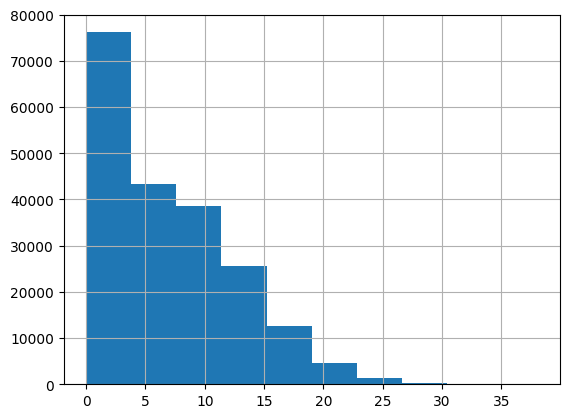

In [4]:
calls.duration.hist();

In [5]:
sessions = pd.read_csv('D:\\Jupyter\\8. Statistical data analysis\\internet.csv')
sessions.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


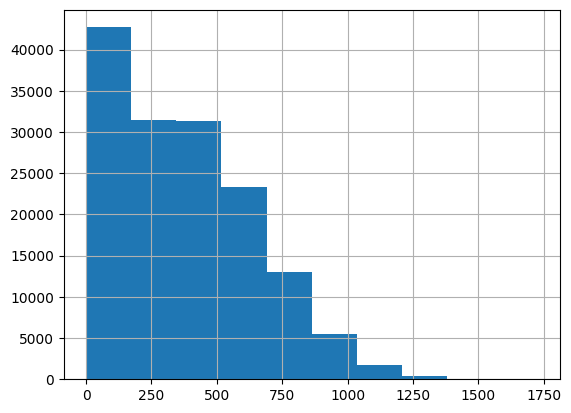

In [7]:
sessions.mb_used.hist();

In [8]:
messages = pd.read_csv('D:\\Jupyter\\8. Statistical data analysis\\messages.csv')
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [10]:
tariffs = pd.read_csv('D:\\Jupyter\\8. Statistical data analysis\\tariffs.csv')
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 260.0+ bytes


In [12]:
users = pd.read_csv('D:\\Jupyter\\8. Statistical data analysis\\users.csv')
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


## 2. Data preprocessing

In [14]:
users.reg_date = pd.to_datetime(users.reg_date,format='%Y-%m-%d')
users.churn_date = pd.to_datetime(users.churn_date,format='%Y-%m-%d')
sessions.session_date = pd.to_datetime(sessions.session_date,format='%Y-%m-%d')
calls.call_date = pd.to_datetime(calls.call_date,format='%Y-%m-%d')
messages.message_date = pd.to_datetime(messages.message_date,format='%Y-%m-%d')

calls.duration = np.ceil(calls.duration).astype('int')

sessions = sessions.drop(columns=['Unnamed: 0'])

Creating new month columns

In [15]:
calls['month'] = pd.DatetimeIndex(calls.call_date).month
messages['month'] = pd.DatetimeIndex(messages.message_date).month
sessions['month'] = pd.DatetimeIndex(sessions.session_date).month

Counting the number of calls for each user by month

In [16]:
calls_per_month = ( pd
                   .pivot_table(calls, index=['user_id','month'],values='id',aggfunc='count')
                   .rename(columns={'id':'calls'})
                  )
calls_per_month = calls.groupby(by=['user_id','month']).agg(calls=('duration', 'count'))
calls_per_month.head(30)

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63
1002    6         15
        7         26
        8         42
        9         36
        10        33
        11        32
        12        33
1003    8         55
        9        134
        10       108
        11       115
        12       108
1004    5          9
        6         31
        7         22
        8         19
        9         26
        10        29
        11        19
        12        21

Counting minutes spent for each user by month

In [17]:
minutes_per_month = ( pd
                     .pivot_table(calls, index=['user_id','month'],values='duration',aggfunc='sum')
                     .rename(columns={'duration':'minutes'})
                    )
minutes_per_month = calls.groupby(by=['user_id','month']).agg(minutes=('duration', 'sum'))
minutes_per_month.head(30)

minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
        10         350
        11         338
        12         333
1001    11         430
        12         414
1002    6          117
        7          214
        8          289
        9          206
        10         212
        11         243
        12         236
1003    8          380
        9          961
        10         855
        11         824
        12         802
1004    5           35
        6          171
        7          135
        8          137
        9          117
        10         145
        11         117
        12         130

Counting the number of messages sent for each user by month

In [18]:
messages_per_month = ( pd
                      .pivot_table(messages, index=['user_id','month'],values='id',aggfunc='count')
                      .rename(columns={'id':'messages'})
                     )
messages_per_month = messages.groupby(by=['user_id','month']).agg(messages=('message_date', 'count'))
messages_per_month.head(30)

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11
        8            13
        9             4
        10           10
        11           16
        12           12
1003    8            37
        9            91
        10           83
        11           94
        12           75
1004    5            95
        6           134
        7           181
        8           151
        9           146
        10          165
        11          158
        12          162
1005    1             7
        2            38

Counting megabytes spent for each user by month

In [19]:
sessions_per_month = ( pd
                      .pivot_table(sessions, index=['user_id','month'],values='mb_used',aggfunc='sum')
                     )
sessions_per_month = sessions.groupby(by=['user_id','month']).agg({'mb_used': 'sum'})
sessions_per_month.head(30)

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66
1002    6      10856.82
        7      17580.10
        8      20319.26
        9      16691.08
        10     13888.25
        11     18587.28
        12     18113.73
1003    8       8565.21
        9      12468.87
        10     14768.14
        11     11356.89
        12     10121.53
1004    5      13403.98
        6      17600.02
        7      22229.58
        8      28584.37
        9      15109.03
        10     18475.44
        11     15616.02
        12     18021.04

## 3. Data analysis
### 3.1. Studying object parameters

In [20]:
users['churn_date'].count() / users['churn_date'].shape[0] * 100

7.6

7.6% of clients from the dataset terminated their contracts

Let's combine all the values calculated above into one user_behavior dataframe.

In [21]:
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')\

user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Cheching missing values and filling them

In [22]:
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

In [23]:
user_behavior['calls'] = user_behavior['calls'].fillna(0)
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

In [24]:
tariffs = tariffs.rename(
    columns={
        'tariff_name': 'tariff'
    }
)
user_behavior = user_behavior.merge(tariffs, on='tariff')

Counting the number of conversation minutes, messages and megabytes exceeding those included in the tariff and then converting megabytes exceeding the tariff into gigabytes and saving them in the paid_gb column

In [25]:
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0
    
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

Calculating revenue for call minutes, messages and internet

In [26]:
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

Calculating monthly revenue from each user, it will be stored in the total_cost column

In [27]:
user_behavior['total_cost'] = \
      user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

stats_df dataframe for each “month - tariff” pair will store the main characteristics

In [28]:
stats_df = user_behavior.pivot_table(
            index=['month', 'tariff'],\
            values=['calls', 'minutes', 'messages', 'mb_used'],\
            aggfunc=['mean', 'std', 'median']\
).round(2).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

stats_df.head(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,203.85,20.81,6444.68,16.20,154.23,20.5,7096.18,15.0,162.5
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
2,2,smart,40.19,11597.05,24.09,298.69,25.39,6247.35,21.75,190.82,38.5,12553.71,20.0,258.0
3,2,ultra,41.54,11775.94,21.96,297.12,40.97,10644.64,26.77,296.51,25.0,7327.12,5.5,168.0
4,3,smart,54.32,15104.16,31.86,390.05,25.54,5828.24,26.80,191.89,59.0,15670.25,23.0,409.0
5,3,ultra,67.68,17535.55,32.30,489.65,44.84,10951.79,41.62,333.74,57.0,17495.18,20.0,403.0
6,4,smart,51.31,13462.18,30.74,367.13,25.70,5698.25,24.54,186.49,52.0,14087.65,28.0,368.5
7,4,ultra,64.09,16828.13,31.56,458.02,36.27,9718.65,37.51,267.68,61.0,16645.78,17.0,453.0
8,5,smart,55.24,15805.18,33.77,387.36,25.38,5978.23,27.04,186.60,59.0,16323.94,30.0,433.0
9,5,ultra,72.51,19363.15,37.85,510.33,41.08,10046.11,40.31,289.60,75.0,18696.43,25.0,519.0


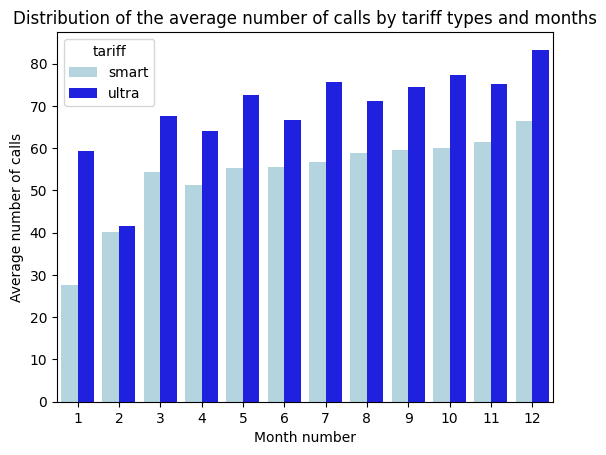

In [41]:
ax = sns.barplot(x='month',
            y='calls_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Distribution of the average number of calls by tariff types and months')
ax.set(xlabel='Month number', ylabel='Average number of calls');

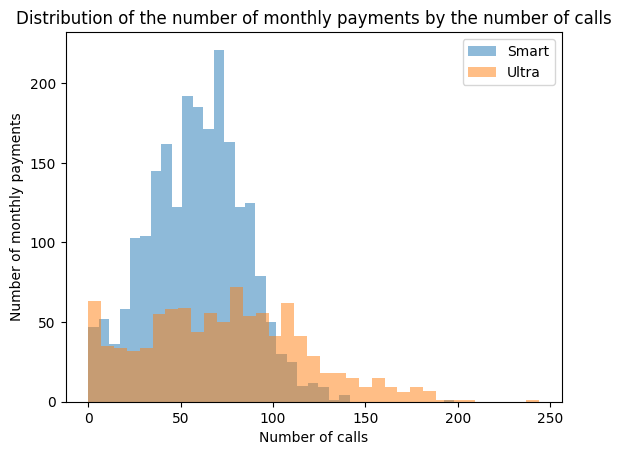

In [40]:
user_behavior.groupby('tariff')['calls'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Number of calls')
plt.ylabel('Number of monthly payments')
plt.title('Distribution of the number of monthly payments by the number of calls')
plt.show()

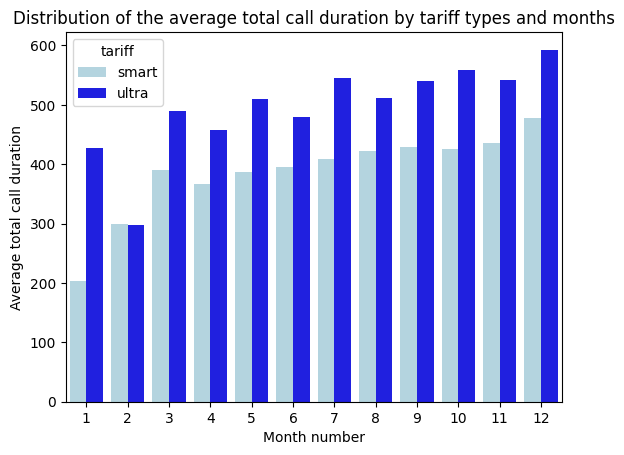

In [44]:
ax = sns.barplot(x='month',
            y='minutes_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Distribution of the average total call duration by tariff types and months')
ax.set(xlabel='Month number', ylabel='Average total call duration');

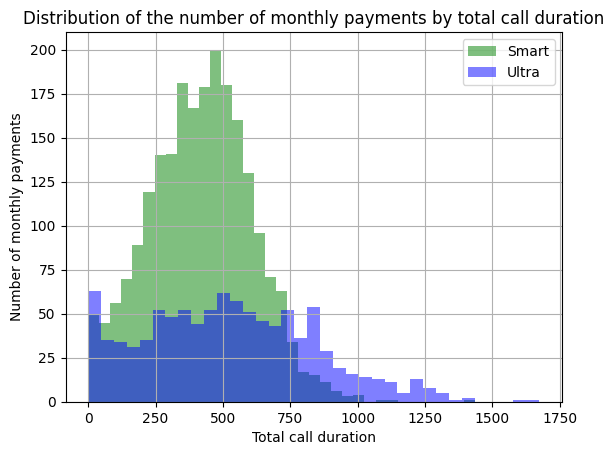

In [45]:
user_behavior[user_behavior['tariff'] =='smart']['minutes'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['minutes'].hist(bins=35, alpha=0.5, color='blue')
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Total call duration')
plt.ylabel('Number of monthly payments')
plt.title('Distribution of the number of monthly payments by total call duration')
plt.show()

The average call duration for Ultra tariff subscribers is longer than for Smart tariff subscribers. Over the course of the year, users of both tariffs increase the average duration of their calls. The growth in the average duration of calls among Smart tariff subscribers is uniform throughout the year. Ultra plan users do not exhibit such linear stability. It is worth noting that in February, subscribers of both tariff plans had the lowest rates.

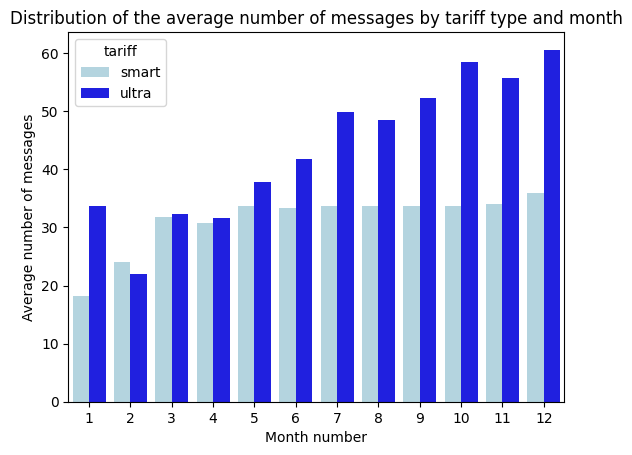

In [46]:
ax = sns.barplot(x='month',
            y='messages_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Distribution of the average number of messages by tariff type and month')
ax.set(xlabel='Month number', ylabel='Average number of messages');

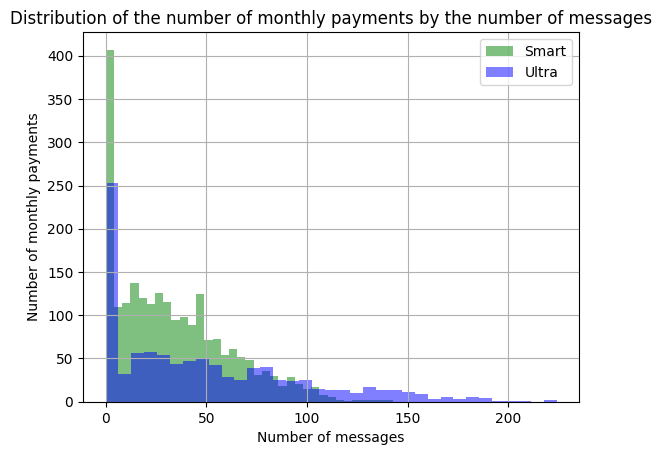

In [47]:
user_behavior[user_behavior['tariff'] =='smart']['messages'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['messages'].hist(bins=35, alpha=0.5, color='blue')
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Number of messages')
plt.ylabel('Number of monthly payments')
plt.title('Distribution of the number of monthly payments by the number of messages')
plt.show()

On average, Ultra plan users send more messages than Smart plan users. The number of messages on both tariffs is growing throughout the year. The dynamics of sending messages are similar to the trends in the duration of calls: in February, the smallest number of messages for the year was noted and users of the Ultra tariff also show strong positive dynamics.

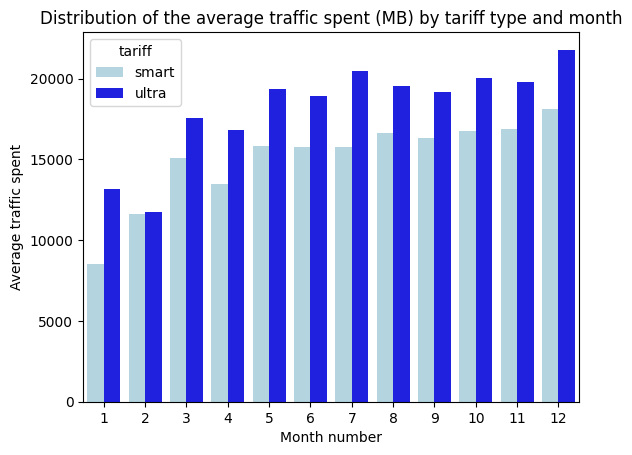

In [48]:
ax = sns.barplot(x='month',
            y='sessions_mean',
            hue='tariff',
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Distribution of the average traffic spent (MB) by tariff type and month')
ax.set(xlabel='Month number', ylabel='Average traffic spent');

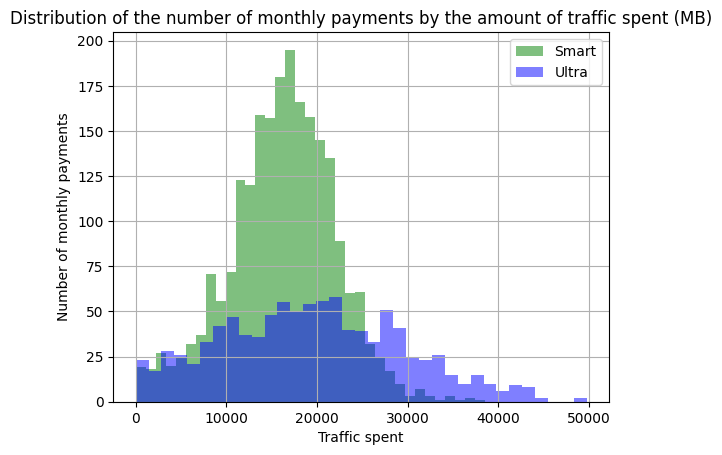

In [49]:
user_behavior[user_behavior['tariff'] =='smart']['mb_used'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['mb_used'].hist(bins=35, alpha=0.5, color='blue')
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Traffic spent')
plt.ylabel('Number of monthly payments')
plt.title('Distribution of the number of monthly payments by the amount of traffic spent (MB)')
plt.show()

Users used the Internet the least in January, February and April. Most often, Smart tariff subscribers spend 15–17 GB, and Ultra tariff plan subscribers spend 19–21 GB.
### 3.2. Testing hypotheses
Hypothesis: the average revenue of users of Ultra and Smart tariffs differs;

H_0: Revenue (total_cost) of "Ultra" users = revenue (total_cost) of "Smart" users

H_a: Revenue (total_cost) of "Ultra" users ≠ revenue (total_cost) of "Smart" users

alpha = 0.05

In [50]:
results = st.ttest_ind(
    user_behavior.loc[user_behavior['tariff'] == 'ultra','total_cost'],
    user_behavior.loc[user_behavior['tariff'] == 'smart','total_cost'],
    equal_var = False
)

alpha = 0.05
print('p-value: ', results.pvalue)
if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Could not reject the null hypothesis') 

p-value:  4.2606313931076085e-250
Rejecting the null hypothesis


Hypothesis: average revenue from users from Moscow differs from revenue from users in other regions;

H_0: Revenue (total_cost) of users from Moscow = revenue (total_cost) of users not from Moscow

H_1: Revenue (total_cost) of users from Moscow ≠ revenue (total_cost) of users not from Moscow

alpha = 0.05

In [51]:
results = st.ttest_ind(
    user_behavior.loc[user_behavior['city'] == 'Москва','total_cost'],
    user_behavior.loc[user_behavior['tariff'] != 'Москва','total_cost'],
    equal_var = False
)

alpha = 0.05
print('p-value: ', results.pvalue)
if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Could not reject the null hypothesis') 

p-value:  0.5989670526299276
Could not reject the null hypothesis
